In [1]:
!pip install yfinance

In [29]:
import yfinance as yf

# Define the stock symbol and the time range for the data
stock_symbol = 'AAPL'
start_date = '2014-01-01'
end_date = '2022-12-31'

# Retrieve the historical data
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Display the retrieved data
print(stock_data)


[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-01-02   19.845715   19.893929   19.715000   19.754642   17.364958   
2014-01-03   19.745001   19.775000   19.301071   19.320715   16.983526   
2014-01-06   19.194643   19.528570   19.057142   19.426071   17.076141   
2014-01-07   19.440001   19.498571   19.211430   19.287144   16.954014   
2014-01-08   19.243214   19.484285   19.238930   19.409286   17.061386   
...                ...         ...         ...         ...         ...   
2022-12-23  130.919998  132.419998  129.639999  131.860001  131.477127   
2022-12-27  131.380005  131.410004  128.720001  130.029999  129.652435   
2022-12-28  129.669998  131.029999  125.870003  126.040001  125.674026   
2022-12-29  127.989998  130.479996  127.730003  129.610001  129.233658   
2022-12-30  128.410004  129.949997  127.430

In [30]:
# Handling missing values
stock_data = stock_data.fillna(method='ffill')  # Forward fill missing values
stock_data = stock_data.dropna()  # Drop any remaining missing values

In [31]:
# Calculate differences
stock_data['Open_diff'] = stock_data['Open'].shift(1) - stock_data['Open']
stock_data['Low_diff'] = stock_data['Low'].shift(1) - stock_data['Low']
stock_data['Close_diff'] = stock_data['Close'].shift(1) - stock_data['Close']
stock_data['High_diff'] = stock_data['High'].shift(1) - stock_data['High']

# Calculate average of differences
stock_data['Average_diff'] = (stock_data['Open_diff'] + stock_data['Low_diff'] + stock_data['Close_diff'] + stock_data['High_diff']) / 4

# Display the updated data
print(stock_data)



                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-01-02   19.845715   19.893929   19.715000   19.754642   17.364958   
2014-01-03   19.745001   19.775000   19.301071   19.320715   16.983526   
2014-01-06   19.194643   19.528570   19.057142   19.426071   17.076141   
2014-01-07   19.440001   19.498571   19.211430   19.287144   16.954014   
2014-01-08   19.243214   19.484285   19.238930   19.409286   17.061386   
...                ...         ...         ...         ...         ...   
2022-12-23  130.919998  132.419998  129.639999  131.860001  131.477127   
2022-12-27  131.380005  131.410004  128.720001  130.029999  129.652435   
2022-12-28  129.669998  131.029999  125.870003  126.040001  125.674026   
2022-12-29  127.989998  130.479996  127.730003  129.610001  129.233658   
2022-12-30  128.410004  129.949997  127.430000  129.929993  129.552719   

               Volume  Open_diff  Low

In [32]:
import pandas as pd

# Set display option to show all rows
pd.set_option('display.max_rows', None)

# Display the Average_diff column
print(stock_data['Average_diff'])

# Reset display option to default (optional)
pd.reset_option('display.max_rows')


Date
2014-01-02             NaN
2014-01-03    2.668748e-01
2014-01-06    2.338400e-01
2014-01-07   -5.767965e-02
2014-01-08    1.535749e-02
2014-01-09    8.840084e-03
2014-01-10    1.861606e-01
2014-01-13    5.946350e-02
2014-01-14   -2.766070e-01
2014-01-15   -4.798212e-01
2014-01-16    4.517841e-02
2014-01-17    2.996430e-01
2014-01-21    3.187466e-02
2014-01-22   -2.408037e-01
2014-01-23    8.039474e-04
2014-01-24    6.241131e-02
2014-01-27   -6.071568e-03
2014-01-28    1.507053e+00
2014-01-29    1.932139e-01
2014-01-30    4.616070e-02
2014-01-31    1.308937e-01
2014-02-03   -1.813402e-01
2014-02-04   -1.400881e-01
2014-02-05   -1.233935e-01
2014-02-06   -2.857161e-02
2014-02-07   -3.347321e-01
2014-02-10   -1.452680e-01
2014-02-11   -3.230357e-01
2014-02-12   -1.058040e-01
2014-02-13   -1.113391e-01
2014-02-14   -1.384821e-01
2014-02-18   -1.351781e-01
2014-02-19    2.270532e-01
2014-02-20    2.966075e-01
2014-02-21    1.154466e-01
2014-02-24    1.265173e-01
2014-02-25    9.196281e

In [33]:
# Calculate 6-day average of Average_diff and divide by 5
stock_data['6_day_average'] = stock_data['Average_diff'].rolling(window=6).sum() / 5

# Display the updated data
print(stock_data['6_day_average'])


Date
2014-01-02         NaN
2014-01-03         NaN
2014-01-06         NaN
2014-01-07         NaN
2014-01-08         NaN
                ...   
2022-12-23    1.530000
2022-12-27    1.051999
2022-12-28    1.069500
2022-12-29    0.551000
2022-12-30    1.113500
Name: 6_day_average, Length: 2266, dtype: float64


In [34]:
# Set display option to show all rows
pd.set_option('display.max_rows', None)

# Display the Average_diff column
print(stock_data['6_day_average'])

# Reset display option to default (optional)
pd.reset_option('display.max_rows')


Date
2014-01-02         NaN
2014-01-03         NaN
2014-01-06         NaN
2014-01-07         NaN
2014-01-08         NaN
2014-01-09         NaN
2014-01-10    0.130679
2014-01-13    0.089196
2014-01-14   -0.012893
2014-01-15   -0.097321
2014-01-16   -0.091357
2014-01-17   -0.033197
2014-01-21   -0.064054
2014-01-22   -0.124107
2014-01-23   -0.068625
2014-01-24    0.039822
2014-01-27    0.029572
2014-01-28    0.271054
2014-01-29    0.303321
2014-01-30    0.360714
2014-01-31    0.386732
2014-02-03    0.337982
2014-02-04    0.311179
2014-02-05   -0.014911
2014-02-06   -0.059268
2014-02-07   -0.135446
2014-02-10   -0.190679
2014-02-11   -0.219018
2014-02-12   -0.212161
2014-02-13   -0.209750
2014-02-14   -0.231732
2014-02-18   -0.191821
2014-02-19   -0.117357
2014-02-20    0.006571
2014-02-21    0.050822
2014-02-24    0.098393
2014-02-25    0.127929
2014-02-26    0.191482
2014-02-27    0.131643
2014-02-28    0.035625
2014-03-03    0.022446
2014-03-04   -0.035018
2014-03-05   -0.044911
2014-0

In [35]:
import pandas as pd

# Calculate 5% target values
stock_data['High_5pct'] = stock_data['Close'] * 1.05  # Calculate 5% higher target
stock_data['Low_5pct'] = stock_data['Close'] * 0.95  # Calculate 5% lower target

# Initialize decision and accuracy columns
stock_data['Decision'] = ''  # Buy/Sell decision
stock_data['Accuracy'] = ''  # Accuracy of the decision

# Loop through the DataFrame to evaluate decisions and accuracy
for i, row in stock_data.iterrows():
    if row['6_day_average'] > 0:
        # Buy decision
        target_high_reached = any(
            (row['High_5pct'] <= stock_data.loc[i + pd.DateOffset(days=1):i + pd.DateOffset(days=20), 'High']) |
            (row['High_5pct'] <= stock_data.loc[i + pd.DateOffset(days=1):i + pd.DateOffset(days=20), 'Low'])
        )
        if target_high_reached:
            stock_data.at[i, 'Decision'] = 'Buy'
            stock_data.at[i, 'Accuracy'] = 'Achieved'
        else:
            stock_data.at[i, 'Decision'] = 'Buy'
            stock_data.at[i, 'Accuracy'] = 'Not Achieved'
    else:
        # Sell decision
        target_low_reached = any(
            (row['Low_5pct'] >= stock_data.loc[i + pd.DateOffset(days=1):i + pd.DateOffset(days=20), 'Low']) |
            (row['Low_5pct'] >= stock_data.loc[i + pd.DateOffset(days=1):i + pd.DateOffset(days=20), 'High'])
        )
        if target_low_reached:
            stock_data.at[i, 'Decision'] = 'Sell'
            stock_data.at[i, 'Accuracy'] = 'Achieved'
        else:
            stock_data.at[i, 'Decision'] = 'Sell'
            stock_data.at[i, 'Accuracy'] = 'Not Achieved'

# Display the updated data
print(stock_data)



                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-01-02   19.845715   19.893929   19.715000   19.754642   17.364958   
2014-01-03   19.745001   19.775000   19.301071   19.320715   16.983526   
2014-01-06   19.194643   19.528570   19.057142   19.426071   17.076141   
2014-01-07   19.440001   19.498571   19.211430   19.287144   16.954014   
2014-01-08   19.243214   19.484285   19.238930   19.409286   17.061386   
...                ...         ...         ...         ...         ...   
2022-12-23  130.919998  132.419998  129.639999  131.860001  131.477127   
2022-12-27  131.380005  131.410004  128.720001  130.029999  129.652435   
2022-12-28  129.669998  131.029999  125.870003  126.040001  125.674026   
2022-12-29  127.989998  130.479996  127.730003  129.610001  129.233658   
2022-12-30  128.410004  129.949997  127.430000  129.929993  129.552719   

               Volume  Open_diff  Low

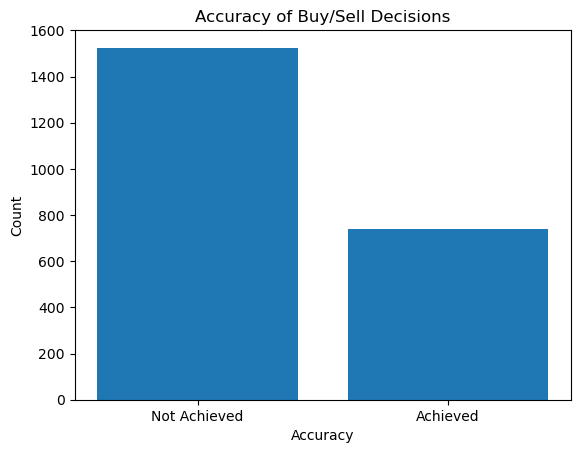

In [36]:
import matplotlib.pyplot as plt

# Count the occurrences of each accuracy value
accuracy_counts = stock_data['Accuracy'].value_counts()

# Plot the accuracy
plt.bar(accuracy_counts.index, accuracy_counts.values)
plt.xlabel('Accuracy')
plt.ylabel('Count')
plt.title('Accuracy of Buy/Sell Decisions')
plt.show()


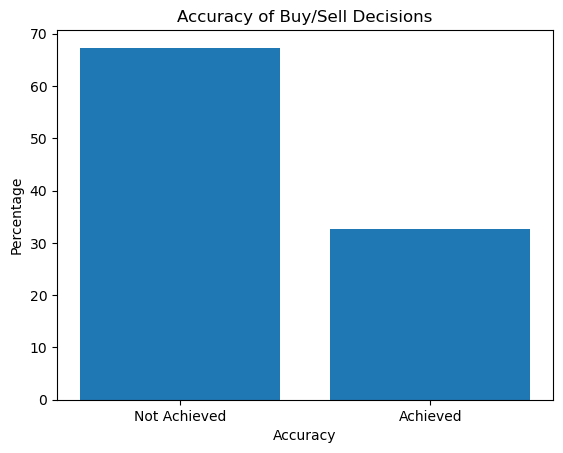

In [37]:
import matplotlib.pyplot as plt

# Calculate the percentage of each accuracy value
accuracy_percentages = stock_data['Accuracy'].value_counts(normalize=True) * 100

# Plot the accuracy percentages
plt.bar(accuracy_percentages.index, accuracy_percentages.values)
plt.xlabel('Accuracy')
plt.ylabel('Percentage')
plt.title('Accuracy of Buy/Sell Decisions')
plt.show()


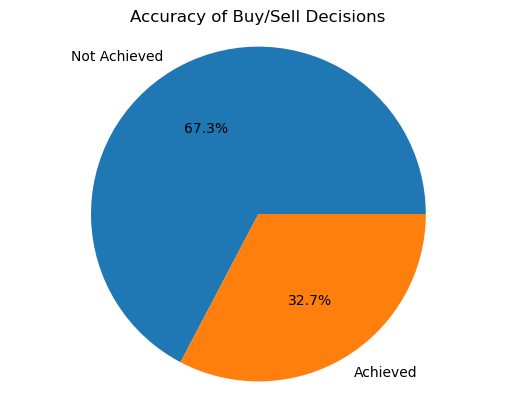

In [38]:
import matplotlib.pyplot as plt

# Calculate the percentage of each accuracy value
accuracy_percentages = stock_data['Accuracy'].value_counts(normalize=True) * 100

# Create the pie chart
plt.pie(accuracy_percentages.values, labels=accuracy_percentages.index, autopct='%1.1f%%')
plt.title('Accuracy of Buy/Sell Decisions')

# Set aspect ratio to 'equal' to ensure a circular pie chart
plt.axis('equal')

# Display the chart
plt.show()
